In [86]:
import pandas as pd
import seaborn as sbn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [87]:
data = pd.read_csv("Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [88]:
data.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [89]:
removal = ["country","child_mort"]
data = data.drop(removal, axis=1)
data.head()

,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   exports     167 non-null    float64
 1   health      167 non-null    float64
 2   imports     167 non-null    float64
 3   income      167 non-null    int64  
 4   inflation   167 non-null    float64
 5   life_expec  167 non-null    float64
 6   total_fer   167 non-null    float64
 7   gdpp        167 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 10.6 KB


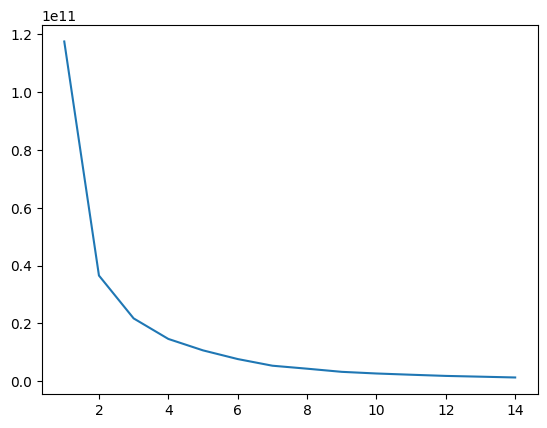

In [91]:
values = []
for i in range(1,15):
    model = KMeans(n_clusters=i, init= "k-means++", random_state=101)
    model.fit(data)
    values.append(model.inertia_)
plt.plot(range(1,15), values)
plt.show()

In [92]:
# no. of clusters = 3

In [93]:
model = KMeans(n_clusters=3, init= "k-means++", random_state=101)
y = model.fit_predict(data)
y

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

In [94]:
data["Grade"] = y

<AxesSubplot:xlabel='Grade', ylabel='exports'>

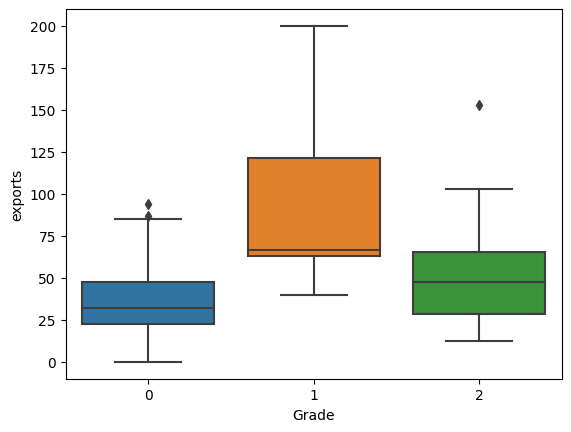

In [95]:
sbn.boxplot(x=data["Grade"], y=data["exports"], data=data)

<AxesSubplot:xlabel='Grade', ylabel='imports'>

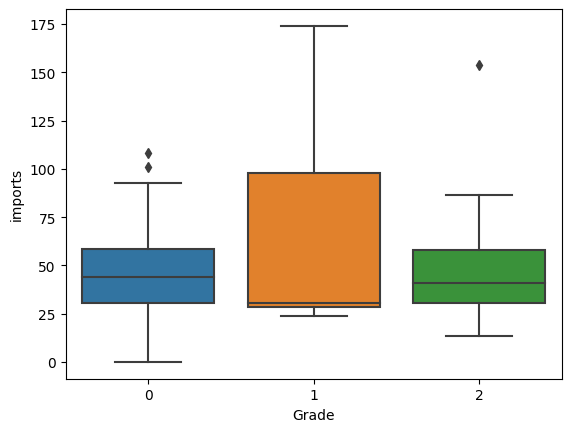

In [96]:
sbn.boxplot(x=data["Grade"], y=data["imports"], data=data)

<AxesSubplot:xlabel='Grade', ylabel='health'>

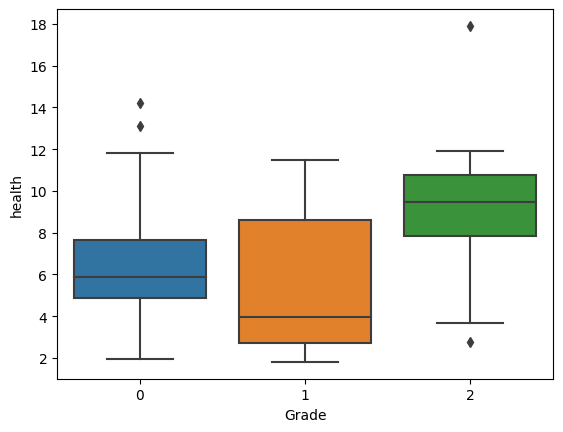

In [97]:
sbn.boxplot(x=data["Grade"], y=data["health"], data=data)

<AxesSubplot:xlabel='Grade', ylabel='gdpp'>

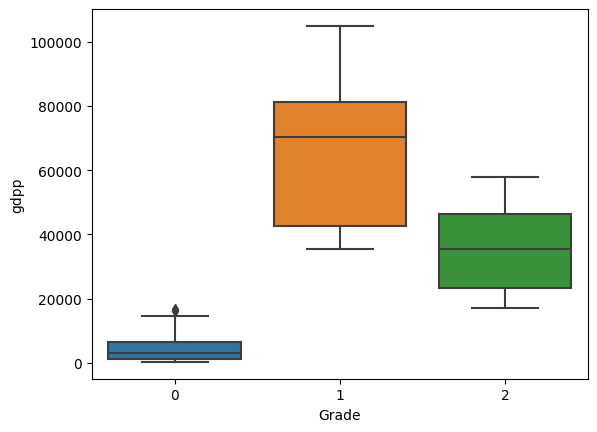

In [98]:
sbn.boxplot(x=data["Grade"], y=data["gdpp"], data=data)

In [99]:
# As 0 has very low gdp compared to others, O is low class country. Similarly, 1 is rich class country and 2 is middle class country

In [104]:
def Grade_Update(cols):
    Grade = cols[0]
    if Grade == 0:
        Grade = "Poor"
    elif Grade == 1:
        Grade = "Rich"
    else:
        Grade = "Middle - Class"
    return Grade

In [106]:
data["Grades"] = data[["Grade"]].apply(Grade_Update, axis=1)
data.head()

,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Grade,Grades
0,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,Poor
1,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,Poor
2,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,Poor
3,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,Poor
4,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,Poor
